In [1]:
base_dir = 'c:\\projekty\\cobot_july_august2\\'

In [2]:
# konkatenacja

import pandas as pd
import glob

# Uzyskaj listę plików CSV w katalogu i posortuj je
pliki_csv = sorted(glob.glob(base_dir + '20230*.csv'))

# Wczytaj i skonkatenuj pliki CSV
dfs = [pd.read_csv(plik) for plik in pliki_csv]
df_skonkatenowany = pd.concat(dfs, ignore_index=True)

# Zapisz skonkatenowany DataFrame do nowego pliku CSV
df_skonkatenowany.to_csv(base_dir + 'concatenated.csv', index=False)


In [7]:
# dodanie wheels_change 

from datetime import datetime
import pytz

# Ścieżka do pliku CSV
sciezka_csv = base_dir + 'concatenated.csv'

# Wczytaj plik CSV
df = pd.read_csv(sciezka_csv)

# Ustaw strefę czasową na Polską
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)

# Początkowa wartość dla nowej kolumny
df['WHEEL_DIAMETER'] = 52.9

# Lista krotek z granicznymi timestampami i odpowiadającymi wartościami
lista_krotek = [
    (datetime(2023, 8, 1, 9, 30, tzinfo=pytz.timezone('Europe/Warsaw')), 53.16),
    (datetime(2023, 8, 1, 9, 40, tzinfo=pytz.timezone('Europe/Warsaw')), 53.42),
    (datetime(2023, 8, 1, 9, 55, tzinfo=pytz.timezone('Europe/Warsaw')), 53.69),
    (datetime(2023, 8, 1, 10, 12, tzinfo=pytz.timezone('Europe/Warsaw')), 53.95),
    (datetime(2023, 8, 1, 10, 28, tzinfo=pytz.timezone('Europe/Warsaw')), 54.22),
    (datetime(2023, 8, 1, 10, 44, tzinfo=pytz.timezone('Europe/Warsaw')), 54.48),
    (datetime(2023, 8, 1, 10, 58, tzinfo=pytz.timezone('Europe/Warsaw')), 54.75),
    (datetime(2023, 8, 1, 11, 15, tzinfo=pytz.timezone('Europe/Warsaw')), 54.97),
    (datetime(2023, 8, 1, 11, 28, tzinfo=pytz.timezone('Europe/Warsaw')), 55.23),
    (datetime(2023, 8, 1, 12, 10, tzinfo=pytz.timezone('Europe/Warsaw')), 55.49),
    (datetime(2023, 8, 1, 12, 25, tzinfo=pytz.timezone('Europe/Warsaw')), 55.76),
    (datetime(2023, 8, 1, 12, 41, tzinfo=pytz.timezone('Europe/Warsaw')), 56.03),
    (datetime(2023, 8, 1, 12, 58, tzinfo=pytz.timezone('Europe/Warsaw')), 56.29),
    (datetime(2023, 8, 1, 13, 16, tzinfo=pytz.timezone('Europe/Warsaw')), 56.55),
    (datetime(2023, 8, 1, 13, 28, tzinfo=pytz.timezone('Europe/Warsaw')), 56.81),
    (datetime(2023, 8, 1, 13, 45, tzinfo=pytz.timezone('Europe/Warsaw')), 57.08),
    (datetime(2023, 8, 1, 14, 0, tzinfo=pytz.timezone('Europe/Warsaw')), 57.67),
    (datetime(2023, 8, 1, 14, 15, tzinfo=pytz.timezone('Europe/Warsaw')), 57.93),
    (datetime(2023, 8, 2, 10, 16, tzinfo=pytz.timezone('Europe/Warsaw')), 58.19),
    (datetime(2023, 8, 2, 10, 36, tzinfo=pytz.timezone('Europe/Warsaw')), 58.46),
    (datetime(2023, 8, 2, 10, 50, tzinfo=pytz.timezone('Europe/Warsaw')), 58.72),
    (datetime(2023, 8, 2, 11, 8, tzinfo=pytz.timezone('Europe/Warsaw')), 58.99),
    (datetime(2023, 8, 2, 11, 30, tzinfo=pytz.timezone('Europe/Warsaw')), 59.23),
    (datetime(2023, 8, 2, 11, 50, tzinfo=pytz.timezone('Europe/Warsaw')), 59.51),
    (datetime(2023, 8, 2, 12, 10, tzinfo=pytz.timezone('Europe/Warsaw')), 59.77),
    (datetime(2023, 8, 2, 12, 30, tzinfo=pytz.timezone('Europe/Warsaw')), 60.04),
    (datetime(2023, 8, 2, 12, 44, tzinfo=pytz.timezone('Europe/Warsaw')), 60.31),
    (datetime(2023, 8, 2, 13, 0, tzinfo=pytz.timezone('Europe/Warsaw')), 60.57),
    (datetime(2023, 8, 2, 13, 16, tzinfo=pytz.timezone('Europe/Warsaw')), 60.99),
    (datetime(2023, 8, 2, 13, 30, tzinfo=pytz.timezone('Europe/Warsaw')), 61.26),
    (datetime(2023, 8, 2, 13, 50, tzinfo=pytz.timezone('Europe/Warsaw')), 61.51),
    (datetime(2023, 8, 2, 14, 10, tzinfo=pytz.timezone('Europe/Warsaw')), 61.83),
    (datetime(2023, 8, 2, 14, 30, tzinfo=pytz.timezone('Europe/Warsaw')), 62.09),
    (datetime(2023, 8, 2, 14, 50, tzinfo=pytz.timezone('Europe/Warsaw')), 62.36),
    (datetime(2023, 8, 2, 15, 5, tzinfo=pytz.timezone('Europe/Warsaw')), 62.62)
]

# Iteruj przez listę krotek i aktualizuj wartości w kolumnie "WHEEL_CHANGE"
for timestamp, wartosc in lista_krotek:
    df.loc[df['timestamp'] > timestamp, 'WHEEL_DIAMETER'] = wartosc

# Zapisz zmodyfikowany DataFrame do pliku CSV
df.to_csv(base_dir + 'concatenated_with_wheel_diameter.csv', index=False)

In [8]:
# odfiltrowanie tylko do zmieniajcych sie kolumn

import pandas as pd

def usun_niezmiennosci(df):
    # Wybierz tylko kolumny, które mają więcej niż jedną unikalną wartość
    zmienne_kolumny = df.columns[df.nunique() > 1]

    # Utwórz nowy DataFrame zawierający tylko zmiennych kolumny
    df_zmiennosci = df[zmienne_kolumny]

    return df_zmiennosci

# Ścieżka do pliku CSV
sciezka_csv = base_dir + 'concatenated_with_wheel_diameter.csv'

# Wczytaj plik CSV
df = pd.read_csv(sciezka_csv)

# Usuń kolumny, które nie zmieniają wartości
df_zmiennosci = usun_niezmiennosci(df)

# Zapisz zmodyfikowany DataFrame do pliku CSV
df_zmiennosci.to_csv( base_dir + 'concatenated_with_wheel_diameter_changing_columns.csv', index=False)


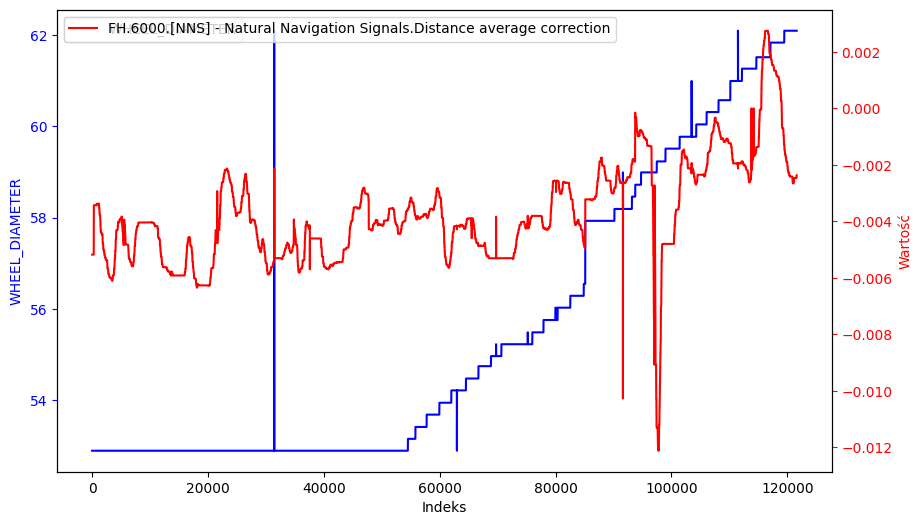

In [2]:
# Wykresy

import pandas as pd
import matplotlib.pyplot as plt

# Ścieżka do pliku CSV
sciezka_csv = base_dir + 'concatenated_with_wheel_diameter_changing_columns.csv'

# Wczytaj plik CSV
df = pd.read_csv(sciezka_csv)

# Wybierz kolumny do narysowania
kolumna1 = 'WHEEL_DIAMETER'
# kolumna2 = 'FH.6000.[NNS] - Natural Navigation Signals.Difference heading average correction'
kolumna2 = 'FH.6000.[NNS] - Natural Navigation Signals.Distance average correction'

# Tworzenie dwóch osi Y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Rysuj pierwszą kolumnę na pierwszej osi Y
ax1.plot(df[kolumna1], label=kolumna1, color='b')
ax1.set_xlabel('Indeks')
ax1.set_ylabel(kolumna1, color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')

# Tworzenie drugiej osi Y
ax2 = ax1.twinx()
ax2.plot(df[kolumna2], label=kolumna2, color='r')
ax2.set_ylabel(kolumna2, color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')


# Dodaj etykiety i legendę
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.legend()

# Wyświetl wykres
plt.show()


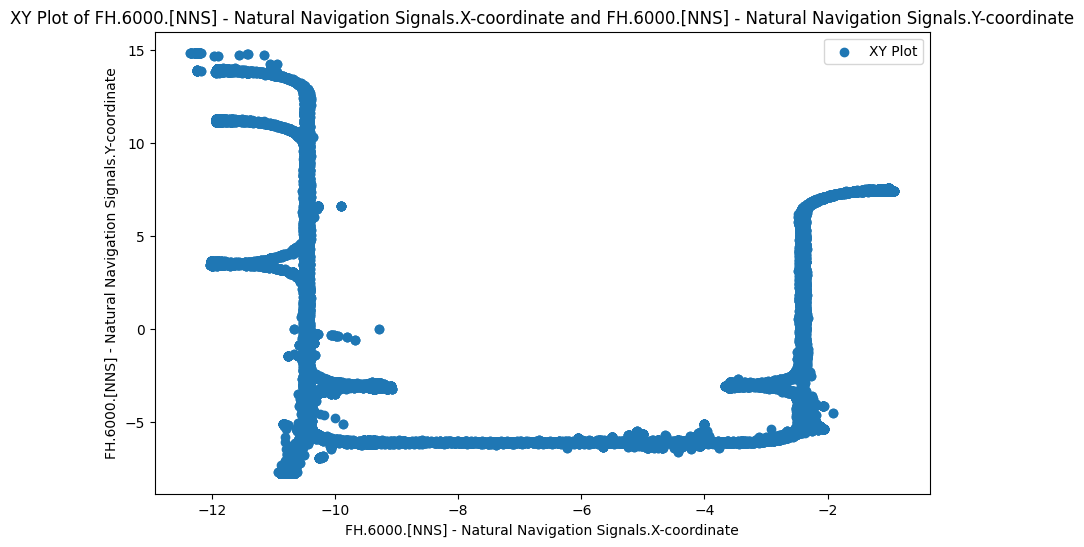

In [3]:
# diagram  ścieżki

import pandas as pd
import matplotlib.pyplot as plt

# Ścieżka do pliku CSV
sciezka_csv =  base_dir + 'concatenated_with_wheels_change_changing_columns.csv'

# Wczytaj plik CSV
df = pd.read_csv(sciezka_csv)

# Wybierz nazwy kolumn
x_column = 'FH.6000.[NNS] - Natural Navigation Signals.X-coordinate'
y_column = 'FH.6000.[NNS] - Natural Navigation Signals.Y-coordinate'

# Rysuj wykres x-y
plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], label='XY Plot')

# Dodaj etykiety i tytuł
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('XY Plot of {} and {}'.format(x_column, y_column))
plt.legend()

# Wyświetl wykres
plt.show()







In [18]:
import pandas as pd

class CoBot20230708Data:
    LABEL_COLUMN = "WHEEL_CHANGE"

    def __init__(self):
        base_dir = 'c:\\projekty\\cobot_july_august\\'
        sciezka_csv = base_dir + 'concatenated_with_wheels_change_changing_columns.csv'

        ignored_columns = [
            'timestamp', 'isoTimestamp', 'FH.6000.[TS] TIME STAMP.Time stamp',
            "FH.6000.[ENS] - Energy Signals.State Of Charge",
            "FH.6000.[ENS] - Energy Signals.Battery cell voltage",
            "FH.6000.[ODS] - Odometry Signals.Cumulative distance right",
            "FH.6000.[ENS] - Energy Signals.Momentary current consuption mA",
            "FH.6000.[ODS] - Odometry Signals.Cumulative distance left",
            "FH.6000.[ENS] - Energy Signals.Cumulative energy consumption Wh",
        ]

        all_the_data = pd.read_csv(sciezka_csv).iloc[2:]
        all_the_data = all_the_data.drop(columns=ignored_columns)

        # move the label column to 0-th index
        self.columns = all_the_data.columns.tolist()
        self.columns.remove(CoBot20230708Data.LABEL_COLUMN)
        self.columns.insert(0, CoBot20230708Data.LABEL_COLUMN)
        self.all_the_data = all_the_data[self.columns]

        self.column_stats = {}
        for column in self.all_the_data.columns:
            column_data = self.all_the_data[column]
            if column_data.dtype != bool:
                self.column_stats[column] = {
                    'mean': column_data.mean(),
                    'std': column_data.std(),
                    'min': column_data.min(),
                    'max': column_data.max(),
                }


In [19]:
the_data = CoBot20230708Data()

In [20]:
def abs_everywhere(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for c in [c for c in df.columns if df[c].dtype in numerics]:
        df[c] = df[c].abs()
    return df

In [21]:
abs_everywhere(the_data.all_the_data.corr()).to_csv(base_dir + "corr_pearson.csv")


In [22]:
abs_everywhere(the_data.all_the_data.corr(method='spearman')).to_csv(base_dir + "corr_spearman.csv")


In [24]:
abs_everywhere(the_data.all_the_data.corr(method='kendall')).to_csv(base_dir + "corr_kendall.csv")